In [1]:
import pandas as pd
import finterstellar as fs

In [2]:
coin = fs.CoinPrice()

In [3]:
cd = 'BTC'

In [4]:
coin_df = coin.bithumb_historical_price(coin_cd=cd, freq='M')
coin_df.head()

,close,open,high,low,volume
2019-06-14 20:41:00,10043000.0,10039000.0,10044000.0,10039000.0,1.2014
2019-06-14 20:42:00,10042000.0,10043000.0,10043000.0,10039000.0,0.7474
2019-06-14 20:43:00,10043000.0,10042000.0,10043000.0,10039000.0,1.1580
2019-06-14 20:44:00,10041000.0,10041000.0,10041000.0,10035000.0,0.1107
2019-06-14 20:45:00,10036000.0,10035000.0,10036000.0,10030000.0,2.1503


In [5]:
trd = fs.SingleAsset()   # fs 라이브러리의 SingleAsset 모듈을 불러와 trd에 로딩

base_date = '2019-04-21 10:00:00'   # 기준일자 설정

In [6]:
df = pd.DataFrame()    # 빈 데이터프레임을 생성하고
df[cd] = coin_df['close'].copy()    # 시세를 복사해 넣음
df['volume'] = coin_df['volume'].copy()    # 시세를 복사해 넣음
df = df.dropna()     # na를 없애고
df.head(3)

,BTC,volume
2019-06-14 20:41:00,10043000.0,1.2014
2019-06-14 20:42:00,10042000.0,0.7474
2019-06-14 20:43:00,10043000.0,1.1580


In [7]:
n = 60     # 평균주가계산 기준일수
sigma = 2     # 편차구간 지정 (시그마의 배수로)

In [8]:
# 볼린저밴드 계산
bb = trd.bollinger_band(df, cd, n, sigma)
# bollinger_band(데이터프레임, 분석대상코드, 평균기준일, 편차구간) - 볼린저밴드 분석값 계산
bb.tail()

,BTC,center,ub,lb,band_size
2019-06-15 20:34:00,10375000.0,1.038457e+07,1.040512e+07,1.036401e+07,41112.440554
2019-06-15 20:36:00,10376000.0,1.038422e+07,1.040463e+07,1.036381e+07,40819.348464
2019-06-15 20:37:00,10377000.0,1.038390e+07,1.040415e+07,1.036365e+07,40509.969478
2019-06-15 20:38:00,10382000.0,1.038375e+07,1.040392e+07,1.036358e+07,40348.482003
2019-06-15 20:40:00,10382000.0,1.038350e+07,1.040338e+07,1.036362e+07,39751.772159


In [9]:
# 샘플링
sample = bb.loc[base_date:]     # 계산 결과를 기준일자 이후만 잘라내 sample 데이터프레임에 저장
sample.head()

,BTC,center,ub,lb,band_size
2019-06-14 20:41:00,10043000.0,NaN,NaN,NaN,NaN
2019-06-14 20:42:00,10042000.0,NaN,NaN,NaN,NaN
2019-06-14 20:43:00,10043000.0,NaN,NaN,NaN,NaN
2019-06-14 20:44:00,10041000.0,NaN,NaN,NaN,NaN
2019-06-14 20:45:00,10036000.0,NaN,NaN,NaN,NaN


In [10]:
book = trd.create_trade_book(sample, cd)
# create_trade_book(데이터프레임, [종목코드]) - 트레이딩북 생성
book.head()

,BTC,t BTC,p BTC
2019-06-14 20:41:00,10043000.0,,
2019-06-14 20:42:00,10042000.0,,
2019-06-14 20:43:00,10043000.0,,
2019-06-14 20:44:00,10041000.0,,
2019-06-14 20:45:00,10036000.0,,


In [11]:
# 트레이딩 전략 설정
thd = 'ub'   # 종목 매도 기준 (편차구간상단:ub, 편차구간중심:center)
buy = 'out'    # 종목 매수 기준 (편차구간 진입 시:in, 편차구간 벗어날 시:out)
book = trd.tradings(sample, book, thd, cd, buy, short=False)
# tradings(데이터프레임, 트레이딩북, 매도기준, 종목코드, 매입기준) - 매매전략을 이용한 백테스팅 수행

In [12]:
# 포지션 계산
book = trd.position(book, cd)
# position(트레이딩북, 종목코드) - 트레이딩 전략 수행에 수반되는 포지션 판단
'''
    z : zero
    l : long
    s : short
    zz : zero to zero
    zl : zero to long
    lz : long to zero
'''
book.head()

,BTC,t BTC,p BTC
2019-06-14 20:41:00,10043000.0,,zz
2019-06-14 20:42:00,10042000.0,,zz
2019-06-14 20:43:00,10043000.0,,zz
2019-06-14 20:44:00,10041000.0,,zz
2019-06-14 20:45:00,10036000.0,,zz


In [13]:
# 수익률 계산
fund_rtn = trd.returns(book, cd, display=True)
# returns(트레이딩북, 종목코드) - 전략의 수익률 계산

2019-06-15 01:47:00 long BTC 10228000.0
2019-06-15 03:03:00 long BTC 10228000.0  | unwind long BTC 10241000.0  | return: 0.13
2019-06-15 09:12:00 long BTC 10436000.0
2019-06-15 11:15:00 long BTC 10436000.0  | unwind long BTC 10394000.0  | return: -0.4
2019-06-15 15:59:00 long BTC 10420000.0
2019-06-15 17:02:00 long BTC 10420000.0  | unwind long BTC 10435000.0  | return: 0.13999999999999999
2019-06-15 18:05:00 long BTC 10409000.0
Accumulated return: -0.13 %  ( # of trade: 3  , # of win: 2  , fee: 0.0  )
Avg return: -0.0004, Prob. of win: 0.6667, Kelly ratio: 33.339999999999996


In [14]:
# 벤치마크 수익률
bm_rtn = trd.benchmark_return(book, cd)
# benchmark_return(트레이딩북, 종목코드) - 벤치마크 수익률 계산

BM return: 3.38 %
{'BTC': 1.0338}


In [15]:
# 초과 수익률
exs_rtn = trd.excess_return(fund_rtn, bm_rtn)
# excess_return(전략수익률, 벤치마크수익률) - 초과수익률 계산

Excess return: -3.4 %


그래프로 표현하기

In [16]:
v = fs.VisualizeIntraday()    # fs 라이브러리의 Visualize() 모듈을 불러와 v로 지정

In [17]:
sample.index[0]

'2019-06-14 20:41:00'

FileNotFoundError: [Errno 2] No such file or directory: './image/(190615) BTC bb_trend_view.png'

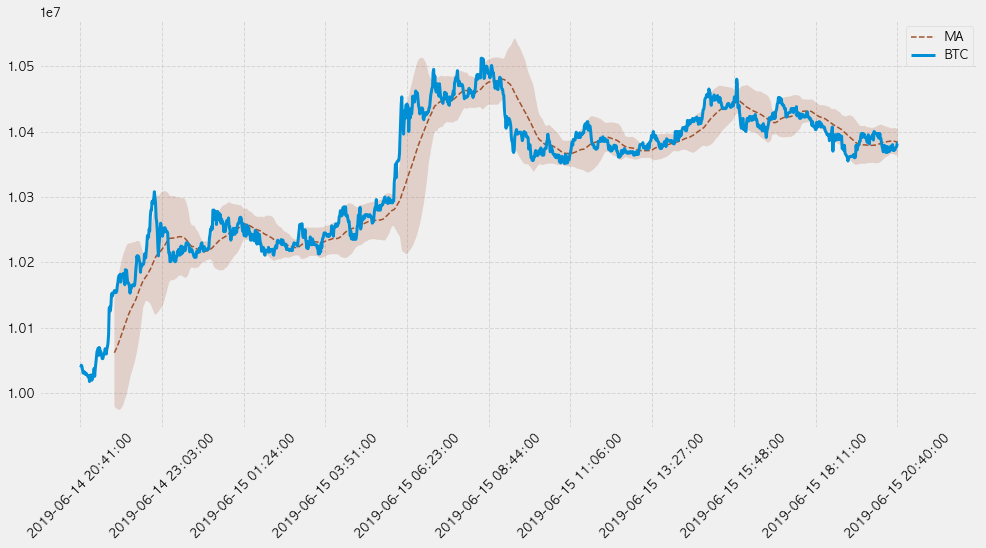

In [18]:
v.BB_trend_view(sample, sigma, cd, (15,5))
# v 모듈의 bb_trend_view(데이터프레임, 편차구간, 종목코드, (사이즈)) 함수 - 볼린저밴드 그래프 그리기

In [ ]:
v.position_view(book, cd)
# v 모듈의 position_view(트레이딩북, 종목코드, (사이즈)) 함수 - 보유내역 그래프 그리기

최근 전략

In [ ]:
#last_date = sample.index[-1].date().strftime('%Y-%m-%d')
last_point = sample.index[-1]
# 현재 투자전략 추출을 위해 데이터 상 최종일 추출
last_point

In [ ]:
trd.trading_strategy(sample, thd, cd, last_point)
# trading_strategy(데이터프레임, 매도기준, 종목코드, 최종일) - 트레이딩 전략 판단

In [ ]:
trd.position_strategy(book, cd, last_point)
# position_strategy(트레이딩북, 종목코드 최종일) - 포지션 구축 전략 판단

백테스팅 결과인 트레이딩북을 한번 구경해볼까요?

In [ ]:
book[(book['p '+cd]=='zl')|(book['p '+cd]=='lz')]